<a href="https://colab.research.google.com/github/itsmeeeeeee/BERT_Probing/blob/main/probing_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing packages and libraries

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast
from transformers import BertModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Loading datatset and BERT Model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the CSV file with specified options
df = pd.read_csv('/content/drive/My Drive/embedding_data/concat_all_embedding_data.csv')

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Sentence_row,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
0,0,45,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,celebrators,NOUN,1.0,"['##ele', '##bra', '##tors']",59,"[0.2368014007806778, 0.7057396173477173, 0.346..."
1,1,49,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,66,"[0.24929562211036682, 0.24487225711345673, 0.0..."
2,2,63,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,groom,NOUN,1.0,NaN,80,"[-0.3184204399585724, -0.004366732202470303, -..."
3,3,65,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,brother,NOUN,1.0,NaN,83,"[0.19683706760406494, 0.23691487312316895, -0...."
4,4,72,Celebration Shooting Turns Wedding Into a Fune...,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,90,"[-0.11486530303955078, 0.16750510036945343, 0...."


In [6]:
model_ckpt = "bert-base-cased"
model = BertModel.from_pretrained(model_ckpt)

In [7]:
df.shape

(20687, 12)

In [8]:
df.isnull().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
Sentence_row                  0
Word_count                    0
Sentence                      0
Sentence_no                   0
Word                          0
POS                           0
end_labels                    0
subword                   20122
word_index                    0
contextualized_vectors        0
dtype: int64

In [9]:
df_fin = df.iloc[:,3:] # optional
df_fin.head()

,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
0,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,celebrators,NOUN,1.0,"['##ele', '##bra', '##tors']",59,"[0.2368014007806778, 0.7057396173477173, 0.346..."
1,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,66,"[0.24929562211036682, 0.24487225711345673, 0.0..."
2,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,groom,NOUN,1.0,NaN,80,"[-0.3184204399585724, -0.004366732202470303, -..."
3,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,brother,NOUN,1.0,NaN,83,"[0.19683706760406494, 0.23691487312316895, -0...."
4,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,90,"[-0.11486530303955078, 0.16750510036945343, 0...."


# Basic Operations

In [10]:
df_fin.shape

(20687, 9)

In [11]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20687 entries, 0 to 20686
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Word_count              20687 non-null  float64
 1   Sentence                20687 non-null  object 
 2   Sentence_no             20687 non-null  int64  
 3   Word                    20687 non-null  object 
 4   POS                     20687 non-null  object 
 5   end_labels              20687 non-null  float64
 6   subword                 565 non-null    object 
 7   word_index              20687 non-null  int64  
 8   contextualized_vectors  20687 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4+ MB


In [12]:
df_fin.isnull().sum()

Word_count                    0
Sentence                      0
Sentence_no                   0
Word                          0
POS                           0
end_labels                    0
subword                   20122
word_index                    0
contextualized_vectors        0
dtype: int64

# EDA and Preprocessing

# Group by a Single Column and Count Frequencies:
To count the frequencies of each unique value in a specific column, you can use the groupby method followed by the count() method.

In [13]:
# Example: Count frequencies of each POS tag
pos_counts = df_fin.groupby('POS')['Word'].count()
pos_counts

POS
ADJ          3
ADP          5
DET          3
NOUN      8955
NUM          2
PRON     11688
PROPN       18
VERB        13
Name: Word, dtype: int64

# Group by Multiple Columns and Calculate Summary Statistics:
You can group by multiple columns and calculate summary statistics like mean, median, or standard deviation.

In [14]:
# Example: Calculate mean wort_index for each POS tag
pos_mean = df_fin.groupby('POS')['word_index'].mean()
print(pos_mean)


POS
ADJ      34.333333
ADP      12.600000
DET       1.000000
NOUN     14.703294
NUM       5.500000
PRON     14.278491
PROPN    10.555556
VERB     20.000000
Name: word_index, dtype: float64


# Count Unique Values within Groups:
You can count unique values within groups using the nunique() method.

In [15]:
# Example: Count unique words within each POS group
pos_unique_words = df_fin.groupby('POS')['Word'].nunique()
print(pos_unique_words)


POS
ADJ         3
ADP         1
DET         1
NOUN     2019
NUM         1
PRON       59
PROPN       9
VERB        6
Name: Word, dtype: int64


# Group by and Filter Data:
You can group by a column and filter data based on group-specific conditions.

In [16]:
# Example: Filter rows where the count of words within each POS group is greater than a threshold
filtered_df = df_fin.groupby('POS').filter(lambda group: len(group) > 100)
filtered_df

,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
0,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,celebrators,NOUN,1.0,"['##ele', '##bra', '##tors']",59,"[0.2368014007806778, 0.7057396173477173, 0.346..."
1,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,66,"[0.24929562211036682, 0.24487225711345673, 0.0..."
2,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,groom,NOUN,1.0,NaN,80,"[-0.3184204399585724, -0.004366732202470303, -..."
3,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,brother,NOUN,1.0,NaN,83,"[0.19683706760406494, 0.23691487312316895, -0...."
4,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,90,"[-0.11486530303955078, 0.16750510036945343, 0...."
...,...,...,...,...,...,...,...,...,...
20682,13.0,"('270', 'people', 'died', 'in', 'the', '1988',...",307826,bombing,NOUN,0.0,NaN,7,"[0.7685377597808838, 1.115256905555725, -0.038..."
20683,35.0,"('Libya', 'initially', 'refused', ' ', 'to', '...",307827,them,PRON,0.0,NaN,13,"[0.11229103803634644, 0.16903077065944672, -0...."
20684,35.0,"('Libya', 'initially', 'refused', ' ', 'to', '...",307827,they,PRON,0.0,NaN,21,"[0.4275742769241333, 0.07952270656824112, 0.25..."
20685,27.0,"('Opinion', 'polls', 'in', 'Israel', 'show', '...",307829,liner,NOUN,0.0,NaN,10,"[0.5175453424453735, -0.12556852400302887, -0...."


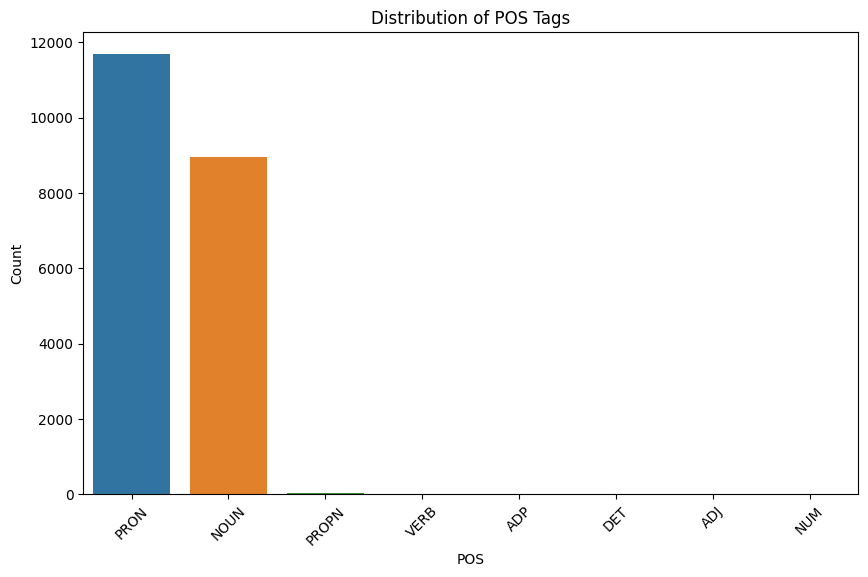

In [17]:
# Plot 1: Distribution of 'POS' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fin, x='POS', order=df_fin['POS'].value_counts().index)
plt.xlabel('POS')
plt.ylabel('Count')
plt.title('Distribution of POS Tags')
plt.xticks(rotation=45)
plt.show()

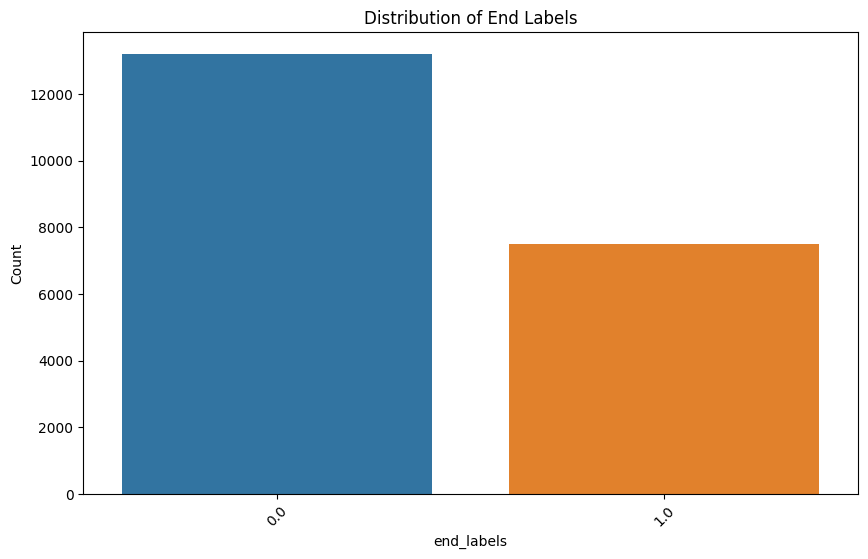

In [18]:
# Plot 2: Distribution of 'end_labels' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fin, x='end_labels', order=df_fin['end_labels'].value_counts().index)
plt.xlabel('end_labels')
plt.ylabel('Count')
plt.title('Distribution of End Labels')
plt.xticks(rotation=45)
plt.show()

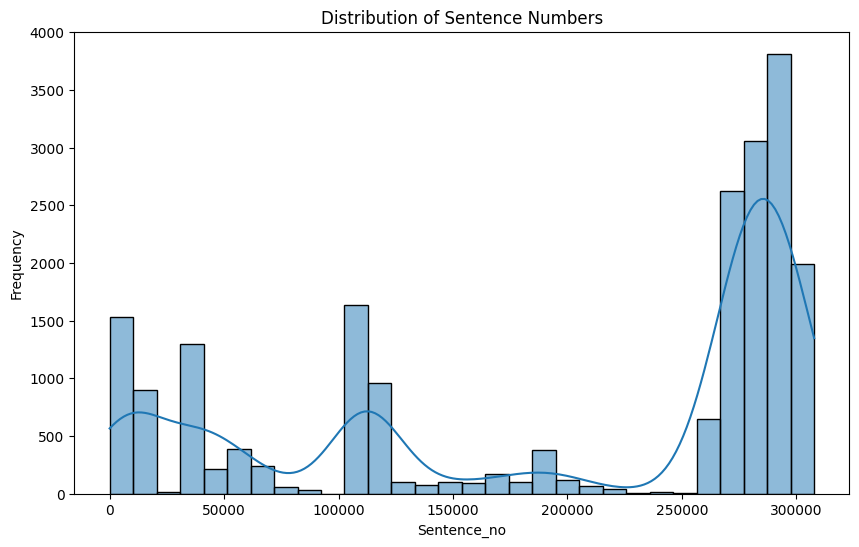

In [19]:
# Plot 3: Distribution of 'Sentence_no' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fin, x='Sentence_no', bins=30, kde=True)
plt.xlabel('Sentence_no')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Numbers')
plt.show()

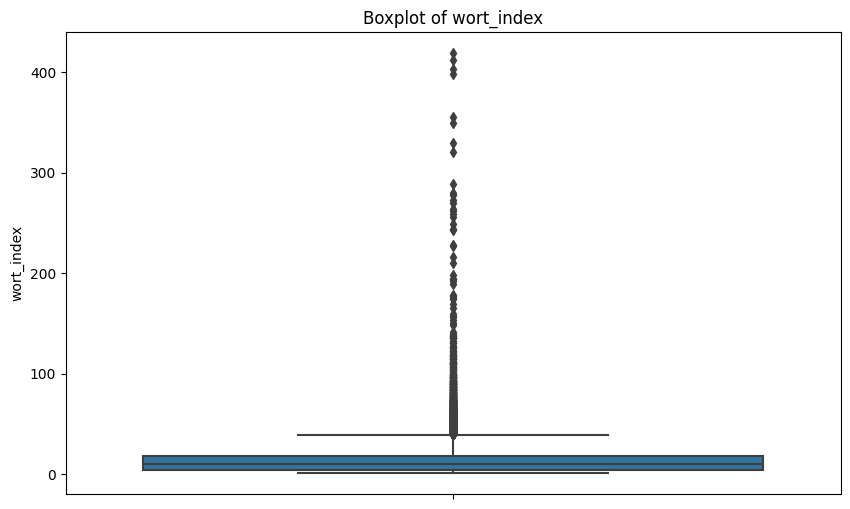

In [20]:
# Plot 4: Boxplot of 'wort_index'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fin, y='word_index')
plt.ylabel('wort_index')
plt.title('Boxplot of wort_index')
plt.show()

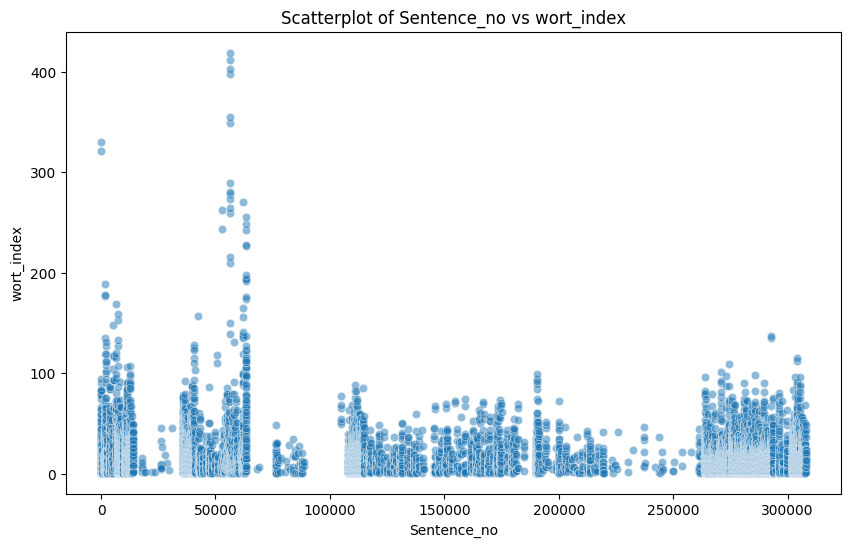

In [21]:
# Plot 5: Example scatterplot (customize as needed)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fin, x='Sentence_no', y='word_index', alpha=0.5)
plt.xlabel('Sentence_no')
plt.ylabel('wort_index')
plt.title('Scatterplot of Sentence_no vs wort_index')
plt.show()

In [22]:
df_fin["end_labels"]= df_fin["end_labels"].astype(int)

# Prob Architecture Implementation

In [23]:
df_fin['end_labels'].value_counts()

0    13191
1     7496
Name: end_labels, dtype: int64

In [24]:
# Standardize input features
scaler = StandardScaler()
X = np.vstack(df_fin['contextualized_vectors'].apply(literal_eval))
X = scaler.fit_transform(X)

In [25]:
samples=len(X)
indicies=np.arange(samples)
df_fin.index=indicies

In [26]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X, df_fin['end_labels'], indicies, test_size=0.2, random_state=30)

In [27]:
# Implement logistic regression or your custom neural network
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8501691638472693
F1-Score: 0.7892590074779062
Confusion Matrix:


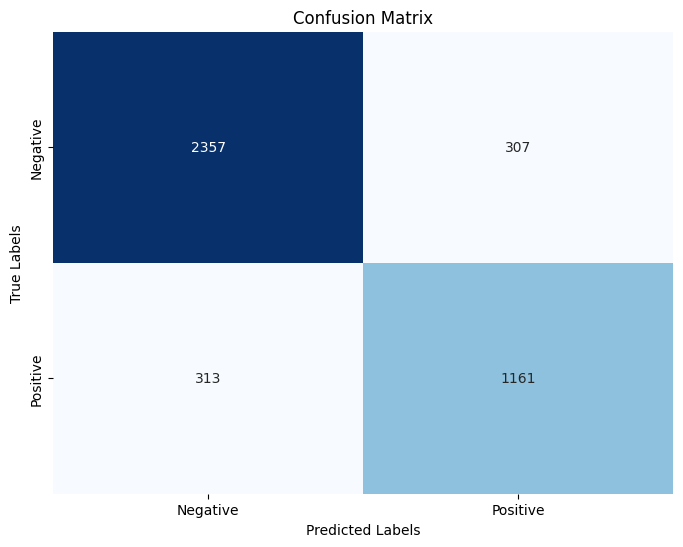

In [28]:

# Evaluate the logistic regression model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Analyzing the results


In [29]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict pronouns and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_pron=0
count_incorrect_pron=0
all_pron=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "PRON":
        all_pron+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_pron+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_pron+=1
print("all_pron",all_pron)
print("correct_pron",count_correct_pron)
print("incorrect_pron",count_incorrect_pron)




    #print("Prediction for words in '{}': {} True Label : {} subtoken : {}".format(row["Word"], y_pred_word[0], row["end_labels"],row["subtoken"]))

all_pron 2351
correct_pron 1721
incorrect_pron 630


In [30]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict nouns and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_noun=0
count_incorrect_noun=0
all_noun=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "NOUN":
        all_noun+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun+=1
print("all_noun",all_noun)
print("correct_noun",count_correct_noun)
print("incorrect_noun",count_incorrect_noun)

all_noun 1779
correct_noun 1678
incorrect_noun 101


In [31]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict PROPN and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_propn=0
count_incorrect_propn=0
all_propn=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "PROPN":
        all_propn+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_propn+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_propn+=1
print("all_propn",all_propn)
print("correct_propn",count_correct_propn)
print("incorrect_propn",count_incorrect_propn)


all_propn 4
correct_propn 4
incorrect_propn 0


In [32]:


# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Counting the number of correctly and incorrectly classified names with and without subtokens
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_noun_subtoken=0
count_incorrect_noun_subtoken=0
all_noun_subtoken=0
all_noun_without_subtoken=0
count_correct_noun_without_subtoken=0
count_incorrect_noun_without_subtoken=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "NOUN" and type(row["subword"]) != float:
        all_noun_subtoken+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun_subtoken+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun_subtoken+=1
    if row["POS"] == "NOUN" and type(row["subword"]) == float:
        all_noun_without_subtoken+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun_without_subtoken+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun_without_subtoken+=1


print("all_noun_subtoken",all_noun_subtoken)
print("count_correct_noun_subtoken",count_correct_noun_subtoken)
print("count_incorrect_noun_subtoken",count_incorrect_noun_subtoken)
print("-----------------------------------------------")
print("all_noun_without_subtoken",all_noun_without_subtoken)
print("count_correct_noun_without_subtoken",count_correct_noun_without_subtoken)
print("count_incorrect_noun_without_subtoken",count_incorrect_noun_without_subtoken)

all_noun_subtoken 118
count_correct_noun_subtoken 101
count_incorrect_noun_subtoken 17
-----------------------------------------------
all_noun_without_subtoken 1661
count_correct_noun_without_subtoken 1577
count_incorrect_noun_without_subtoken 84


In [33]:
filtered_pron_without_subtoken = test_d.loc[(test_d['POS'] =="PRON") & (test_d['subword'].isnull())]
len(filtered_pron_without_subtoken)

2350

In [34]:
# Only two pronouns in test-data bekamme from tokenizer subtoken
filtered_pron_subtoken = test_d.loc[(test_d['POS'] =="PRON") & (test_d['subword'].notnull())]
len(filtered_pron_subtoken)

1

In [35]:
# Implement a custom neural network with optimization techniques
class BinaryClassificationNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(BinaryClassificationNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.ReLU()(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

input_dim = X_train.shape[1]
hidden_dim = 50
learning_rate = 0.01
epochs = 40

model = BinaryClassificationNN(input_dim, hidden_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')


Epoch 1/40, Loss: 0.7523466944694519
Epoch 2/40, Loss: 0.5462725758552551
Epoch 3/40, Loss: 0.4213385283946991
Epoch 4/40, Loss: 0.39323219656944275
Epoch 5/40, Loss: 0.3742083013057709
Epoch 6/40, Loss: 0.35736700892448425
Epoch 7/40, Loss: 0.34491273760795593
Epoch 8/40, Loss: 0.3349173367023468
Epoch 9/40, Loss: 0.3268183171749115
Epoch 10/40, Loss: 0.31983259320259094
Epoch 11/40, Loss: 0.3130119740962982
Epoch 12/40, Loss: 0.30643683671951294
Epoch 13/40, Loss: 0.30091530084609985
Epoch 14/40, Loss: 0.29591017961502075
Epoch 15/40, Loss: 0.29081881046295166
Epoch 16/40, Loss: 0.28571879863739014
Epoch 17/40, Loss: 0.28105372190475464
Epoch 18/40, Loss: 0.27674204111099243
Epoch 19/40, Loss: 0.2725268304347992
Epoch 20/40, Loss: 0.26830998063087463
Epoch 21/40, Loss: 0.2641597390174866
Epoch 22/40, Loss: 0.2600671052932739
Epoch 23/40, Loss: 0.25604379177093506
Epoch 24/40, Loss: 0.252382755279541
Epoch 25/40, Loss: 0.24891677498817444
Epoch 26/40, Loss: 0.24490998685359955
Epoch 2

In [36]:
# Evaluate the custom neural network
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.float32)).squeeze()
    predicted_labels = (test_outputs > 0.5).float()
    accuracy = (predicted_labels == torch.tensor(y_test.values, dtype=torch.float32)).float().mean()

print("Custom Neural Network Accuracy:", accuracy.item())

Custom Neural Network Accuracy: 0.8685355186462402


F1-Score for Custom Neural Network: 0.816464237516869


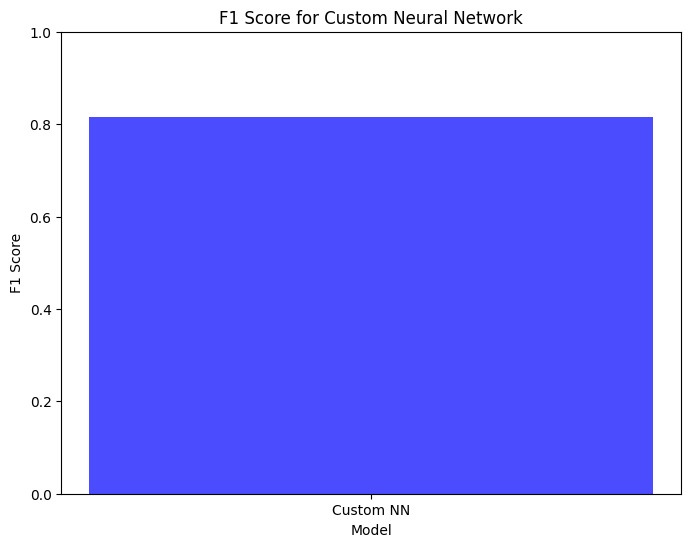

In [37]:
# F1 Score for Custom Neural Network
f1_custom_nn = f1_score(y_test, predicted_labels)

print("F1-Score for Custom Neural Network:", f1_custom_nn)

# Plot F1 Score
plt.figure(figsize=(8, 6))
plt.title("F1 Score for Custom Neural Network")
plt.bar(["Custom NN"], [f1_custom_nn], color='b', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()

Confusion Matrix for Custom Neural Network:
[[2384  280]
 [ 264 1210]]


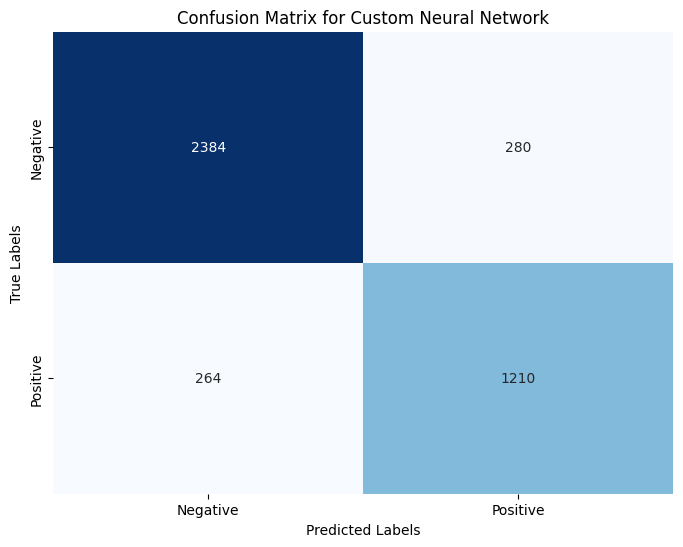

In [38]:

# Confusion Matrix for Custom Neural Network
confusion = confusion_matrix(y_test, predicted_labels)

print("Confusion Matrix for Custom Neural Network:")
print(confusion)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Custom Neural Network')
plt.show()